In [49]:
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm

np.random.seed(0)

n_simulations = 10000
n = 500
p = 200
AR_coef = 0.5
prob_param = 0.08

## Question 1

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:56<00:00, 24.00it/s]


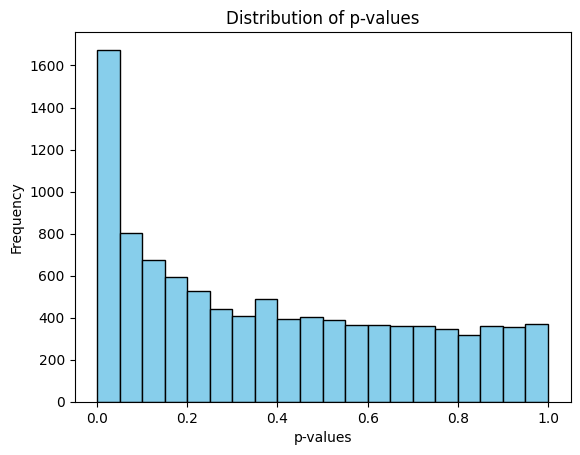

In [50]:
def simulate_and_compute_pvalues(n, p, AR_coef, prob_param):
    pvalues = []
    for _ in tqdm(range(n_simulations)):

        design_matrix = np.zeros((n, p))
        design_matrix[0,:] = np.random.normal(size=p)
        for j in range(1,n):
            design_matrix[j, :] = AR_coef * design_matrix[j-1, :] + np.random.randn(p)

        true_prob = 0.5

        y = np.random.binomial(1, true_prob, size = n)

        logit_model = sm.Logit(y, sm.add_constant(design_matrix))
        result = logit_model.fit(disp=0)

        pvalues.append(result.pvalues[1])

    return np.array(pvalues)

pvalues_scenario1 = simulate_and_compute_pvalues(n, p, AR_coef, prob_param)


import matplotlib.pyplot as plt

plt.hist(pvalues_scenario1, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.title('Distribution of p-values')
plt.show()

## Question 2
### The very general problem addressed by the knockoff methodology one of the problem of variable selection  and that of knowing which predictors are important for the response. Particularly when the number of predictors is much more than the number of samples, the predictive power of the models is diminished as is seen from the chart above where a large number of models have very little predictive power.

## Question 3
### The problem can be solved using the model x paradigm proposed in the paper. Knockoffs solve the controlled variable selection problem by providing a negative control group for the predictors that behaves in the same way as the original null variables but unliked them is known to be null. In the model x paradigm we assume that the explanatory variables are drawn from some distribution. 